In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
data = pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [195]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: ylabel='Frequency'>

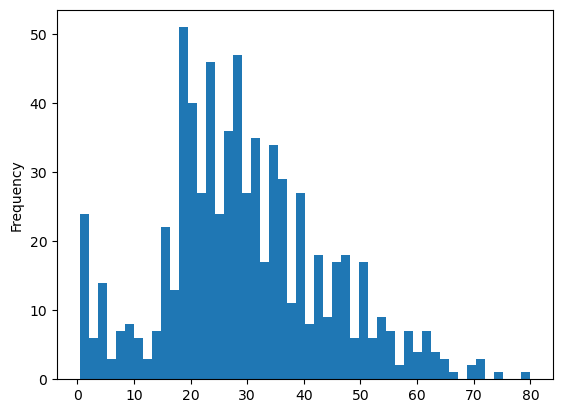

In [196]:
data['Age'].plot(kind='hist',bins=50)

<Axes: ylabel='Frequency'>

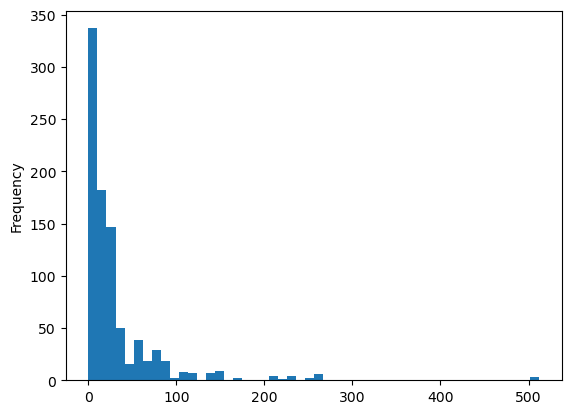

In [197]:
data['Fare'].plot(kind='hist',bins=50)

<Axes: ylabel='Frequency'>

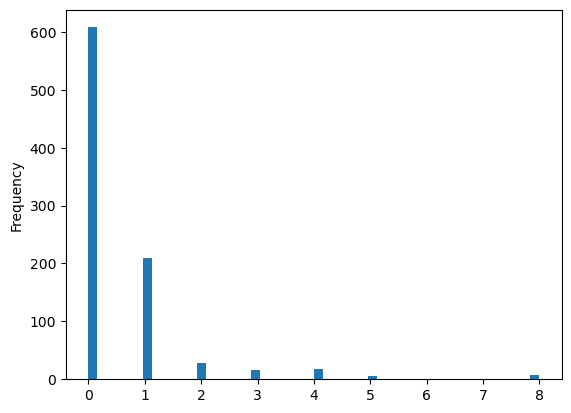

In [198]:
data['SibSp'].plot(kind='hist',bins=50)

<Axes: ylabel='Frequency'>

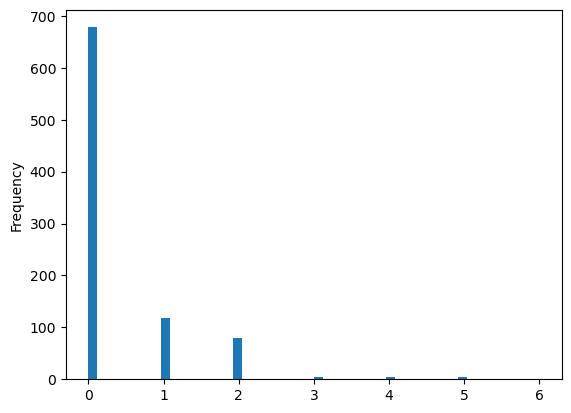

In [199]:
data['Parch'].plot(kind='hist',bins=50)

Filling the Missing Values

In [200]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [201]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [202]:
for col in ['Cabin','Embarked']:
    data[col] = data[col].fillna(data[col].ffill())

In [203]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

In [204]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].bfill())

In [205]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [206]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [207]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']

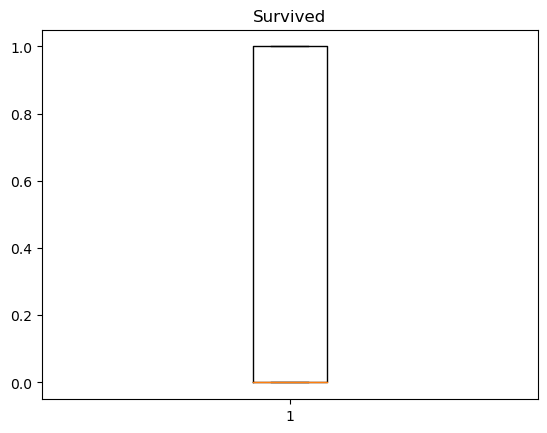

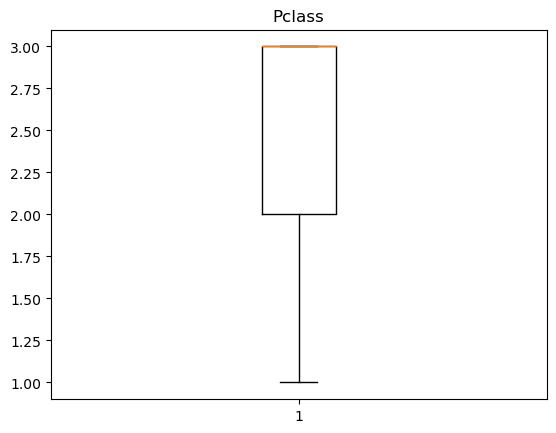

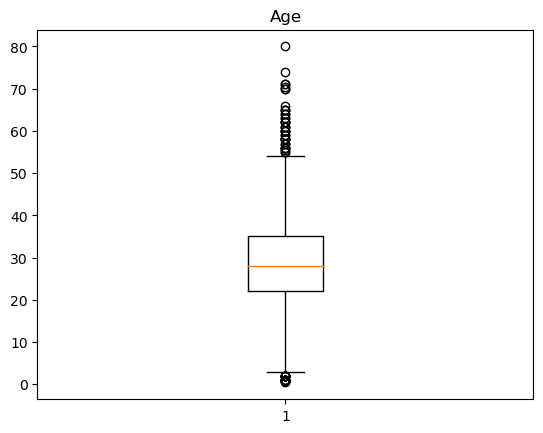

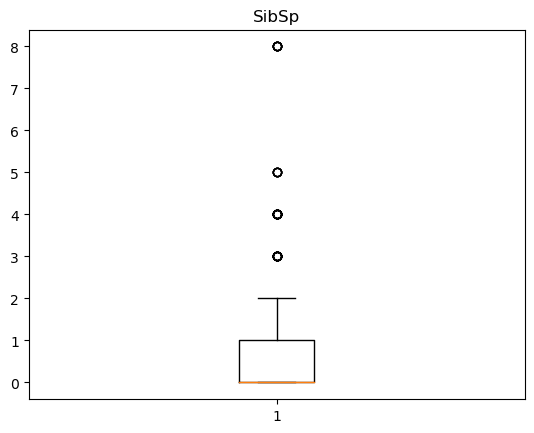

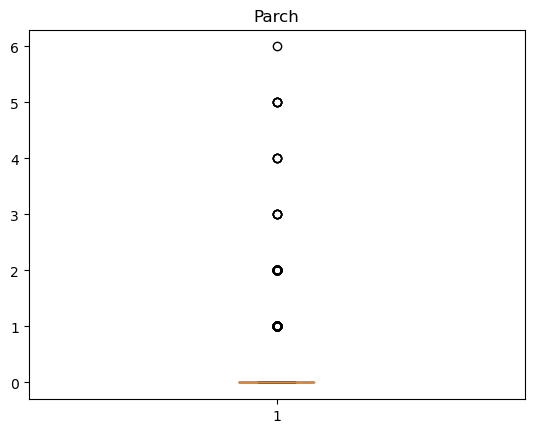

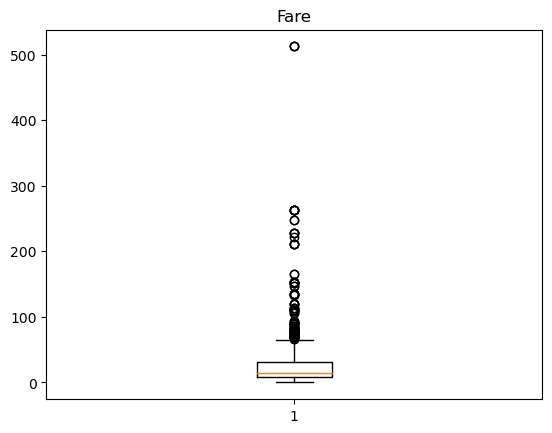

In [208]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    

Outlier detection and handling in SibSp

In [209]:
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method ='midpoint')
Q3 = np.percentile(data['SibSp'],75,method = 'midpoint')

In [210]:
print('Q1 ', Q1)
print('Q2 ', Q2)
print('Q3 ', Q3)

Q1  0.0
Q2  0.0
Q3  1.0


In [211]:
data['SibSp'].median()

0.0

In [212]:
IQR = Q3 - Q1

In [213]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [214]:
print('min is ',low_lim)
print('max is ',up_lim)

min is  -1.5
max is  2.5


In [215]:
outlier = []
for x in data['SibSp']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [216]:
len(outlier)

46

In [217]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [218]:
ind1 = data['SibSp']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64', name='PassengerId')

In [219]:
ind2 = data['SibSp']>up_lim
indes = data.loc[ind2].index
indes

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [220]:
data.drop(indes,inplace=True)

In [221]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,E46,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E46,C


Outlier detection in Parch

In [222]:
Q1  = np.percentile(data['Parch'],25,method='midpoint')
Q2 = np.percentile(data['Parch'],50,method = 'midpoint')
Q3 = np.percentile(data['Parch'],75,method = 'midpoint')

In [223]:
print('Q1 ',Q1)
print('Q2 ',Q2)
print('Q3 ',Q3)

Q1  0.0
Q2  0.0
Q3  0.0


In [224]:
data['Parch'].median()

0.0

In [225]:
IQR = Q3 - Q1

In [226]:
low_lom = Q1 - 1.5*IQR
up_lim = Q3 + 1.5 *IQR

In [227]:
print('min is ',low_lim)
print('max is ', up_lim)

min is  -1.5
max is  0.0


In [228]:
outlier = []
for x in data['Parch']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [229]:
outlier

[2,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 2]

In [230]:
len(outlier)

169

Outlier detection and handling of Age

In [231]:
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method ='midpoint')

In [232]:
print('Q1 ',Q1)
print('Q2 ',Q2)
print('Q3 ',Q3)

Q1  23.0
Q2  28.0
Q3  36.0


In [233]:
data['Age'].median()

28.0

In [234]:
IQR = Q3 - Q1

In [235]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [236]:
print('min is ',low_lim)
print('max is ',up_lim)

min is  3.5
max is  55.5


In [237]:
outlier=[]
for x in data['Age']:
    if x<low_lim:
        outlier.append(x)

In [238]:
outlier

[3.0,
 0.83,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 0.92,
 2.0,
 3.0,
 1.0,
 3.0,
 0.75,
 2.0,
 2.0,
 0.75,
 0.67,
 1.0,
 0.42,
 1.0,
 0.83]

In [239]:
len(outlier)

21

In [240]:
ind_age = data['Age']<low_lim
inds_age = data.loc[ind_age].index
inds_age

Int64Index([ 44,  79, 173, 184, 194, 206, 298, 306, 341, 349, 382, 408, 470,
            480, 531, 645, 756, 789, 804, 828, 832],
           dtype='int64', name='PassengerId')

In [241]:
data.drop(inds_age,inplace = True)

In [242]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,E46,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E46,C


Outlier Detection and Handling of Fare

In [243]:
Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q2 = np.percentile(data['Fare'],50,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')

In [244]:
print('Q1 ',Q1)
print('Q2 ',Q2)
print('Q3 ',Q3)

Q1  7.8958
Q2  13.0
Q3  30.0


In [245]:
IQR = Q3 - Q1

In [246]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [247]:
print('min is ',low_lim)
print('max is ',up_lim)

min is  -25.2605
max is  63.1563


In [248]:
outlier=[]
for x in data['Fare']:
    if ((x<low_lim) or (x>up_lim)):
        outlier.append(x)

In [249]:
len(outlier)

107

In [250]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [251]:
#outlier
ind_fare = data['Fare']>up_lim
ind_fares=data.loc[ind_fare].index
ind_fares

Int64Index([  2,  32,  35,  53,  62,  63,  73,  98, 103, 119,
            ...
            766, 780, 790, 803, 821, 830, 836, 850, 857, 880],
           dtype='int64', name='PassengerId', length=107)

In [252]:
data['Fare'] = np.where(data['Fare'] > (3*up_lim), up_lim, data['Fare']) 

In [253]:
#new_df_cap = df.copy()
#new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks'] > upper_limit,upper_limit,np.where(new_df_cap['placement_exam_marks'] < lower_limit,
       # lower_limit,
       # new_df_cap['placement_exam_marks']

In [254]:
data['Fare'].loc[119]

63.1563

In [255]:
data.shape

(824, 11)

Text(0.5, 1.0, 'Fare')

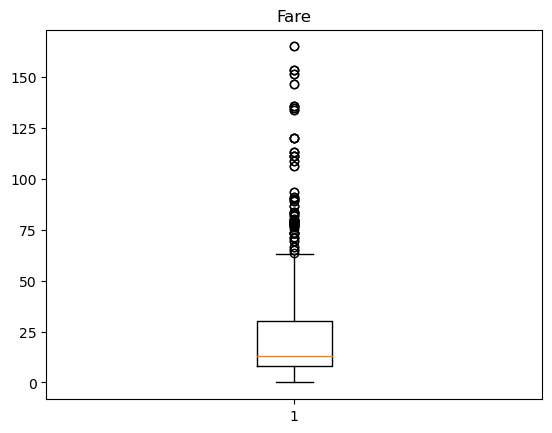

In [256]:
plt.figure()
plt.boxplot(data['Fare'])
plt.title('Fare')

MinMax Scaling

In [352]:
from sklearn.preprocessing import LabelEncoder

In [353]:
le =LabelEncoder()

In [354]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [355]:
#data['Name'] = le.fit_transform(data['Name'])

In [356]:
data['Sex'] = le.fit_transform(data['Sex'])
#data['Sex'] = pd.get_dummies(data['Sex'])


In [357]:
#data['Ticket'] = le.fit_transform(data['Ticket'])

In [358]:
#data['Cabin']=le.fit_transform(data['Cabin'])

In [359]:
data['Embarked']  = le.fit_transform(data['Embarked'])

In [360]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C85,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C85,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,C123,2
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,C50,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,B42,2


In [361]:
X = data[['Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']]
y=data['Survived']

In [362]:
#data.corr() 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [363]:
model = lr.fit(X_train,y_train)


In [364]:
predictions = model.predict(x_test)

In [365]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is: \n',mean_squared_error(y_test,predictions))
print('r2 score : \n', r2_score(y_test,predictions))

MSE is: 
 0.1284059252820587
r2 score : 
 0.43150403283573857


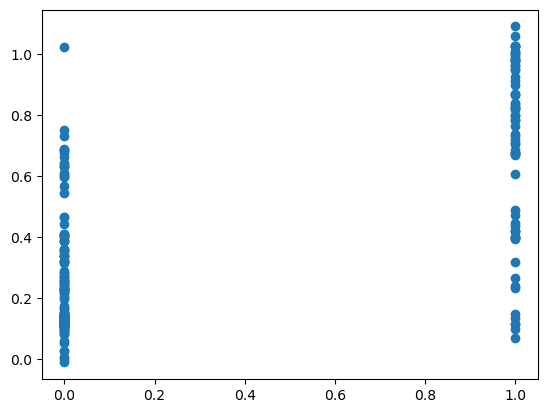

In [366]:
plt.scatter(y_test,predictions)

In [383]:
from sklearn.preprocessing import MinMaxScaler

In [384]:
minmax = MinMaxScaler()
#preprocessing.MinMaxScaler(feature_range=(0,1))

In [385]:
X = minmax.fit_transform(x)

In [386]:
X = pd.DataFrame(x)

In [387]:
X.describe()

,0,1,2,3,4,5,6
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.638956,0.655340,0.354177,0.149879,0.048544,0.160915,0.757282
std,0.422398,0.475546,0.156863,0.260246,0.125695,0.179677,0.401934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.263158,0.000000,0.000000,0.047892,0.500000
50%,1.000000,1.000000,0.315789,0.000000,0.000000,0.078852,1.000000
75%,1.000000,1.000000,0.421053,0.500000,0.000000,0.181965,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [388]:
X.shape

(824, 7)

In [389]:
y.shape

(824,)

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.25)

In [392]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [393]:
model = lr.fit(X_train,y_train)

In [394]:
predictions = model.predict(X_test)

In [395]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is: \n',mean_squared_error(y_test,predictions))
print('r2 score : \n', r2_score(y_test,predictions))

MSE is: 
 0.1284059252820587
r2 score : 
 0.43150403283573857


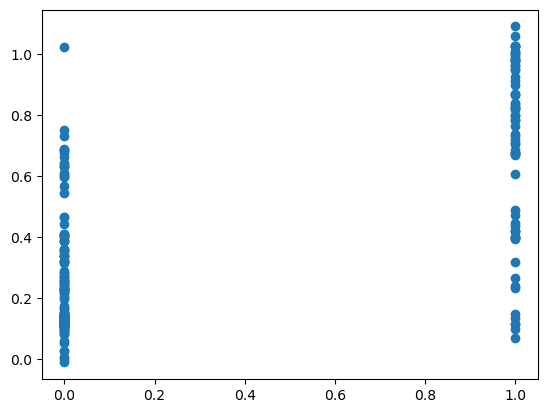

In [396]:
plt.scatter(y_test,predictions)

In [397]:
lr.coef_

array([-0.25739678, -0.55475028, -0.26886917, -0.01240082, -0.19547428,
        0.18865099, -0.02102432])

In [398]:
tt=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
tt

,Coeff
0,-0.257397
1,-0.554750
2,-0.268869
3,-0.012401
4,-0.195474
5,0.188651
6,-0.021024
